<a href="https://colab.research.google.com/github/mauriciovrg91/Algoritmos-financieros-/blob/main/Se%C3%B1ales_de_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# funciones numéricas adicionales
import numpy as np

# lectura de datos y manejo de datos- sets
import pandas as pd

#gráficos
import matplotlib.pyplot as plt

#datos
import pandas_datareader as pdr



In [ ]:
# data frame de petroleo
df = pdr.get_data_fred("DCOILBRENTEU", start="2016-01-01", end = "2021-01-01" )
df = df.dropna()
df.columns = ["Close"]
df

,Close
DATE,
2016-01-04,36.28
2016-01-05,35.56
2016-01-06,33.89
2016-01-07,33.57
2016-01-08,31.67
...,...
2020-12-24,50.88
2020-12-28,50.88
2020-12-29,50.44


In [ ]:
# medias mobiles de corto y de largo EMA 5 días
df["EMA_SHORT"] = df["Close"].ewm(span=5).mean()

# EMA 20 días
df["EMA_LONG"] = df["Close"].ewm(span=20).mean()
df

,Close,EMA_SHORT,EMA_LONG
DATE,,,
2016-01-04,36.28,36.280000,36.280000
2016-01-05,35.56,35.848000,35.902000
2016-01-06,33.89,34.920526,35.163206
2016-01-07,33.57,34.359538,34.703272
2016-01-08,31.67,33.327062,33.969549
...,...,...,...
2020-12-24,50.88,50.792761,49.228966
2020-12-28,50.88,50.821840,49.386208
2020-12-29,50.44,50.694560,49.486569


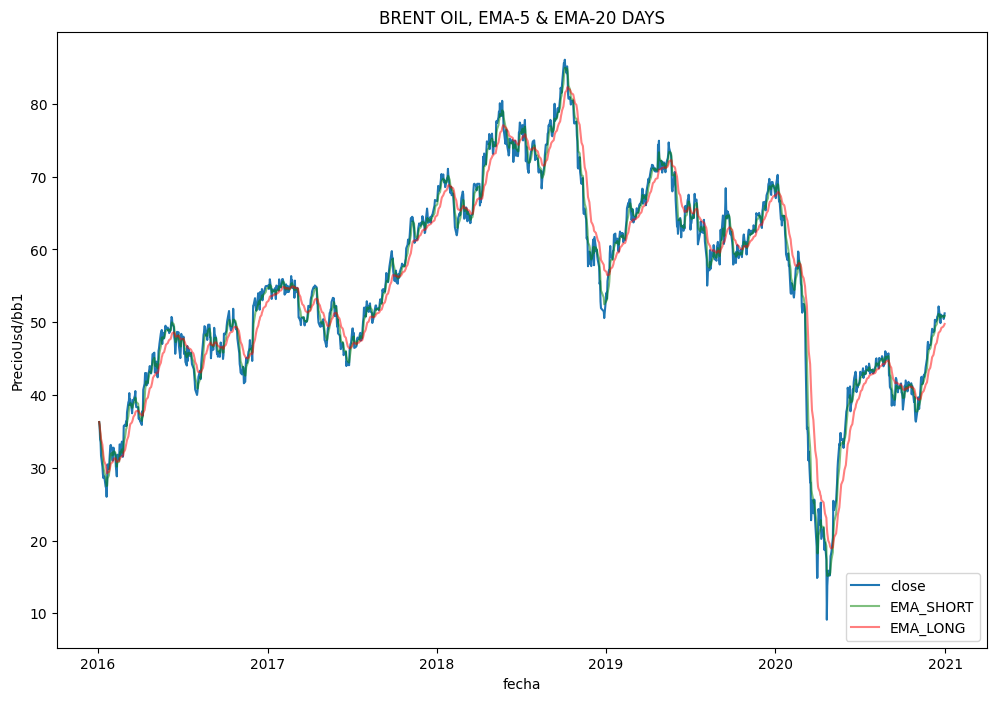

In [ ]:
# Gráfico de la serie de precios y sus medias móviles exponencíales.
plt.figure(figsize=(12, 8))
plt.title("BRENT OIL, EMA-5 & EMA-20 DAYS")
plt.plot(df["Close"])
plt.plot(df["EMA_SHORT"], color="green", alpha=0.5)
plt.plot(df["EMA_LONG"], color="red", alpha=0.5)
plt.xlabel("fecha")
plt.ylabel("PrecioUsd/bb1")
plt.legend(["close", "EMA_SHORT", "EMA_LONG"], loc = "lower right")
plt.show()


In [ ]:
# Número de datos
N = len(df)

# Lista de señales
#-1 vender
# 0 mantener
# 1 compra

signals = [0]

for i in range(1, N):

    short = df["EMA_SHORT"] [i]
    long = df['EMA_LONG'] [i]

    p_short = df["EMA_SHORT"] [i-1]
    p_long = df['EMA_LONG'] [i-1]

    if p_short < p_long and short > long:
        signals.append(1)
    elif p_short > p_long and short < long:
        signals.append(-1)
    else:
        signals.append(0)

df["Siganls"] = signals
df



/tmp/ipython-input-1630671345.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  short = df["EMA_SHORT"] [i]
/tmp/ipython-input-1630671345.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  long = df['EMA_LONG'] [i]
/tmp/ipython-input-1630671345.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_short = df["EMA_SHORT"] [i-1]
/tmp/ipython-input-1630671345.py:17: FutureWarning: Series.__getitem__ treating keys as positions is 

,Close,EMA_SHORT,EMA_LONG,Siganls
DATE,,,,
2016-01-04,36.28,36.280000,36.280000,0
2016-01-05,35.56,35.848000,35.902000,0
2016-01-06,33.89,34.920526,35.163206,0
2016-01-07,33.57,34.359538,34.703272,0
2016-01-08,31.67,33.327062,33.969549,0
...,...,...,...,...
2020-12-24,50.88,50.792761,49.228966,0
2020-12-28,50.88,50.821840,49.386208,0
2020-12-29,50.44,50.694560,49.486569,0


In [ ]:
df["buy"] =np.where(df["Siganls"]==1, df["Close"], np.nan)
df["sell"] =np.where(df["Siganls"]==-1, df["Close"], np.nan)
df

,Close,EMA_SHORT,EMA_LONG,Siganls,buy,sell
DATE,,,,,,
2016-01-04,36.28,36.280000,36.280000,0,NaN,NaN
2016-01-05,35.56,35.848000,35.902000,0,NaN,NaN
2016-01-06,33.89,34.920526,35.163206,0,NaN,NaN
2016-01-07,33.57,34.359538,34.703272,0,NaN,NaN
2016-01-08,31.67,33.327062,33.969549,0,NaN,NaN
...,...,...,...,...,...,...
2020-12-24,50.88,50.792761,49.228966,0,NaN,NaN
2020-12-28,50.88,50.821840,49.386208,0,NaN,NaN
2020-12-29,50.44,50.694560,49.486569,0,NaN,NaN


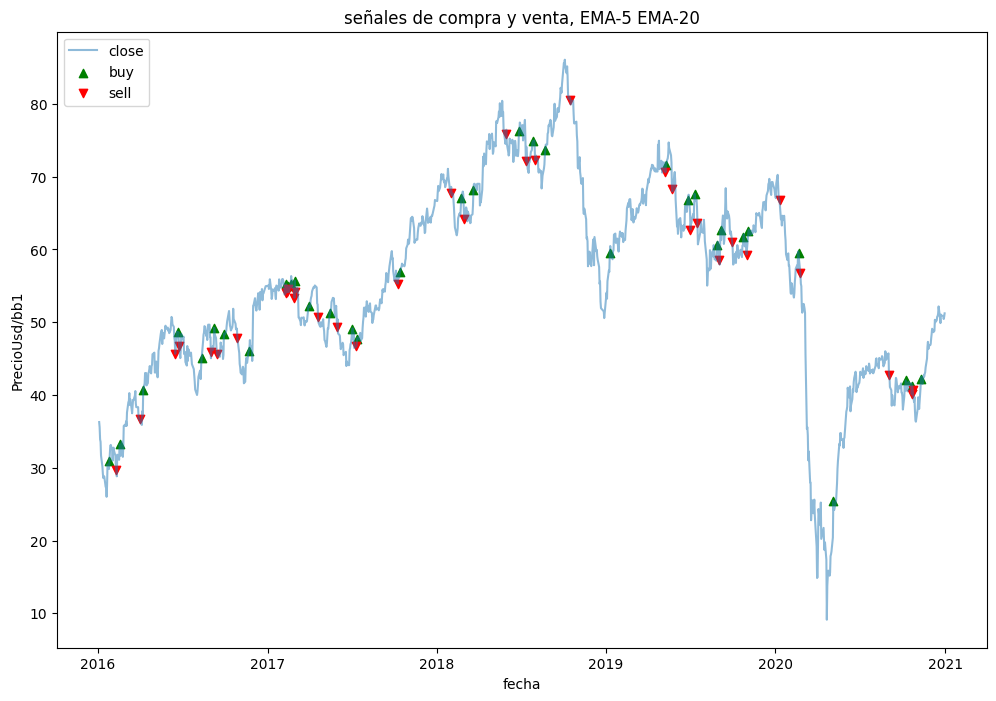

In [ ]:
plt.figure(figsize=(12,8))
plt.title("señales de compra y venta, EMA-5 EMA-20")
plt.plot(df["Close"], alpha = 0.5)
plt.scatter(df.index, df["buy"], color = "green", marker = "^", alpha = 1)
plt.scatter(df.index, df["sell"], color = "red", marker = "v", alpha = 1)
plt.xlabel("fecha")
plt.ylabel("PrecioUsd/bb1")
plt.legend(["close", "buy", "sell"], loc = "upper left")
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.title("señales de compra y venta, EMA-5 EMA-20")
plt.plot(df["Close"], alpha = 0.5)

NameError: name 'plt' is not defined